# Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

The main objective of the competition was to decide how fast a car can pass the process of screening so as to reduce the time spent on the test bench and reduce pollution as a result. Daimler provided a data set of many such cars having numerous ‘anonymous’ features to the Kaggle community to come up with the best algorithm that would help them out in this matter.

# Evaluation Criteria

The metric used for evaluation was Coefficient of Determination (also called R squared).
It is the square of the correlation between the predicted and the actual scores (range 0–1).
In simple terms, how close the model predicts a real value data after being trained with sample data. 

# Data

We have two csv files of the datasets.

1. train.csv file which contain 378 columns and 4209 rows.
2. test.csv file which contain same number of rows and 377 columns except y-label column
3. both csv files contain 8 - categorical features and 368 binary features 

# Import Lib

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split,RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer, StandardScaler
from scipy.stats import kurtosis, skew, yeojohnson
from scipy.special import boxcox, inv_boxcox
#from xgboost import XGBRFRegressor
from sklearn.decomposition import PCA, TruncatedSVD, FastICA 
#from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
import pickle
from joblib import dump, load

In [22]:
train = pd.read_csv(r'C:/Users/Dell/python/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/train.csv')
test =pd.read_csv(r'C:/Users/Dell/python/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/test.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
#Check the Shape of the test and train data
print('train data shape - ', train.shape)
print('test data shape  - ', test.shape)

train data shape -  (4209, 378)
test data shape  -  (4209, 377)


In [25]:
#Cehck duplicates in the test and train data
print("Duplicate in trainData - ",sum(train.duplicated()))
print("Duplicate in testData  - ",sum(test.duplicated()))

Duplicate in trainData -  0
Duplicate in testData  -  0


In [26]:
#Cehck duplicates columns in the test and train data
print("Duplicate in trainData columns - ",sum(train.columns.duplicated()))
print("Duplicate in testData  columns  - ",sum(test.columns.duplicated()))

Duplicate in trainData columns -  0
Duplicate in testData  columns  -  0


In [27]:
#Cehck the Null values in test and train data
print("Null value in the traindata - ", sum(train.isnull().sum()))
print("Null value in the testdata  - ", sum(test.isnull().sum()))

Null value in the traindata -  0
Null value in the testdata  -  0


In [28]:
Y_train = train.y
X_train = train.drop('y', axis = 1)

# OBSERVATION

*   We can see that in above cells No any duplicates value in the train and test data
*   No any Nan value in train and test data
*   train data have total 378 features. data have total 8 - categorical features, except all are binary feature and y - feature is car testing time, 






# Exploratory Data Analysis of Target Y

### Histogram of target value

Skewness y target: 1.206526
Kurtosis y target: 7.910713


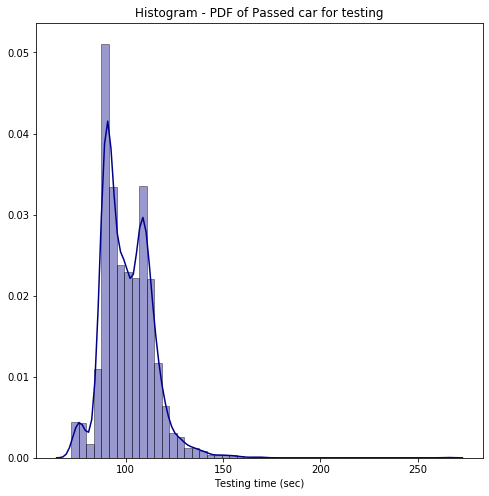

In [16]:
#skewness and kurtosis
print("Skewness y target: %f" % Y_train.skew())
print("Kurtosis y target: %f" % Y_train.kurt())
      
# plot size
plt.figure(figsize = (8, 8))
      
# seaborn histogram
sns.distplot(Y_train, hist=True, kde=True, 
              color = 'Darkblue',
             hist_kws={'edgecolor':'black'})

# Add label and title
plt.title('Histogram - PDF of Passed car for testing')
plt.xlabel('Testing time (sec)')
plt.show()

## OBSERVATION OF HISTOGRAM Y TARGET
# Que - What is the range of time the maximum number of car is tested ? 
*   We can see that above histogram, above plot indicate the y - feature (testing time of the car).
*   We can see that majority cars testing time is lies between 80-125 secs.
*   We can conclude more than 50% cars testing time 80-125 secs

*   We can clearly see that our target value distribution not look like normal distribution and skew, kurtosis is higher.





### Histogram of target value(Log Transform)

Skewness y target: 0.389980
Kurtosis y target: 1.309540


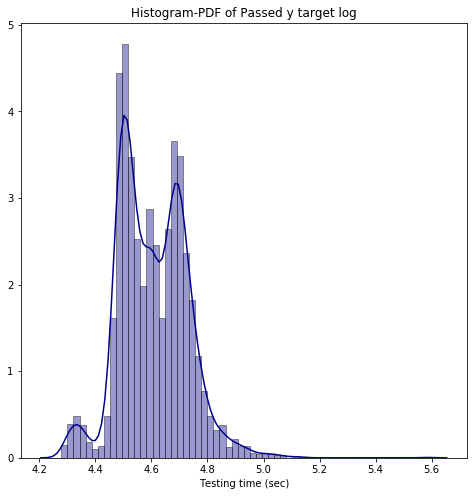

In [17]:
# convert target value using log 
y_train = np.log(Y_train)

# target log value skewess and kurtosis
print("Skewness y target: %f" % y_train.skew())
print("Kurtosis y target: %f" % y_train.kurt())
      
# plot size
plt.figure(figsize = (8, 8))

# seaborn histogram
sns.distplot(y_train, hist=True, kde=True, 
             bins= 60, color = 'Darkblue',
             hist_kws={'edgecolor':'black'})

# Add label and title
plt.title('Histogram-PDF of Passed y target log')
plt.xlabel('Testing time (sec)')
plt.show()

## OBSERVATION OF HISTOGRAM LOG Y 
## Que - What is the distribution of log-transformation y target ? 
*   We can see that above histogram, above plot indicate the log y - feature testing time of the car.
*   After converting into log target, our data does not change more.It not look like normal distribution, but our skew and kurtosis is deceased.
*   We will use another transformation in target y feature. 


### Histogram of target value(Boxcox transform)

Skewness y target: 0.543545
Kurtosis y target: 2.026418


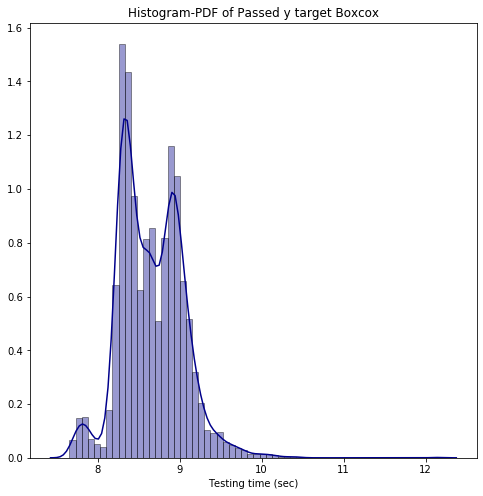

In [18]:
# convert target value into the boxcox value
y_train = boxcox(Y_train, 0.25)

# skewness and kurtosis of boxcox target value
print("Skewness y target: %f" % skew(y_train))
print("Kurtosis y target: %f" % kurtosis(y_train))
      
# plot size
plt.figure(figsize = (8, 8))
      
# seaborn histogram
sns.distplot(y_train, hist=True, kde=True, 
             bins= 60, color = 'Darkblue',
             hist_kws={'edgecolor':'black'})

# Add label and title
plt.title('Histogram-PDF of Passed y target Boxcox')
plt.xlabel('Testing time (sec)')
plt.show()

## OBSERVATION OF HISTOGRAM BOXCOX Y
### Que - What is the distribution of boxcox-transformation y target ? 
*   Converted boxcox transformation, distribution not look like normal distribution. Value of the skew and kurtosis value is decrease than actual y feature but it is greater than log transformation.
*   So we will go with log transformation as compare with boxcox- transformation.



## Histogram of target value(Yeo-Johnson transform)

Skewness y target: -0.015639
Kurtosis y target: 0.397150


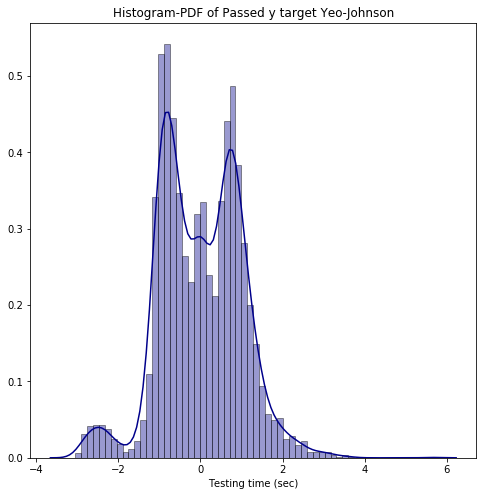

In [19]:
# Convert y target into yeo-johnson method
array = PowerTransformer().fit_transform(Y_train.values.reshape(-1,1))
# Remove list of list in the y target [[1.256], [-2.504]]
y_train = [i for lists in array for i in lists]

# skewness and kurtosis of boxcox target value
print("Skewness y target: %f" % skew(y_train))
print("Kurtosis y target: %f" % kurtosis(y_train))
      
# plot size
plt.figure(figsize = (8, 8))
      
# seaborn histogram
sns.distplot(y_train, hist=True, kde=True, 
             bins= 60, color = 'Darkblue',
             hist_kws={'edgecolor':'black'})

# Add label and title
plt.title('Histogram-PDF of Passed y target Yeo-Johnson')
plt.xlabel('Testing time (sec)')
plt.show()

## OBSERVATION OF HISTOGRAM BOXCOX Y
### Que - What is the distribution of yeo-johnson-transformation y target ? 
*   Converted yeo-johnson transformation, we see that 4 disribution peak in plot. And our skewness and kurtosis are lower than other transformation.



## CDF of target value

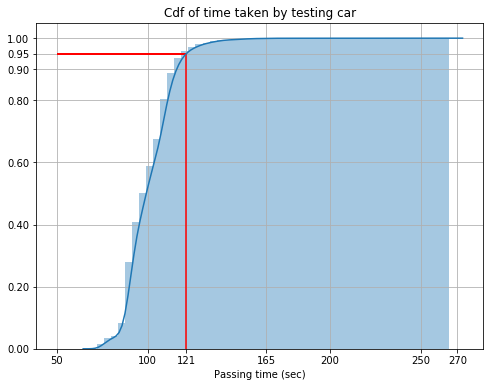

In [20]:
# Change the size of the plot
plt.figure(figsize = (8, 6))

# Seaborn CDF
sns.distplot(Y_train, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})

# Add labels and its range
plt.title('Cdf of time taken by testing car')
plt.xlabel('Passing time (sec)')
plt.xticks([50,100,121,165,200,250,270])
plt.yticks([0.0,0.2,0.4,0.6,0.8,0.9,0.95,1.0])

#h/v line(x, 0, y) use for the put line in the plot 
plt.vlines(121, 0,0.95, color = 'red')
plt.hlines(y=0.95, xmin=50, xmax=121, linewidth=2, color='r')
plt.grid()
plt.show()

## OBSERVATION OF CDF TARGET Y
## Que - What is the 95th percentile of the y feature (testing time of car) ?
*   we can see that above CDF plot of the y feature. we can see that red line in the plot indicate the 95th percentile.
*   Total 95% of cars tested time below 121 secs, Only 5% of the cars tested time is above 121 secs, It could be an outliers.
*   50% of cars tested below 100 secs.







# Exploratory Data Analysis of Binary features
### Select top binary feature using feature-selection technique for EDA

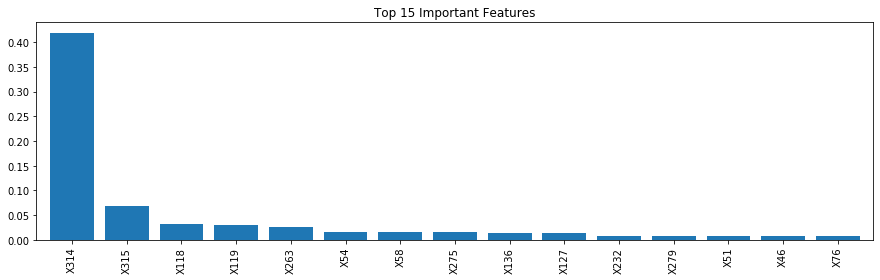

In [21]:
# declare the only binary feature train data and its label
Y_train = train.y
X_train = train.iloc[:, 10:]

#use inbuilt class feature_importances of tree based regression
model = RandomForestRegressor()
model.fit(X_train,Y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# top 15 feature
feat_importances.nlargest(15).plot(kind='bar', figsize=(15,4), width=0.8)
plt.title('Top 15 Important Features')
plt.show()

In [22]:
#Create the list which contains important features and its index
feature_imp = [ ]
for i in range(368):
  value = model.feature_importances_[i]
  index = X_train.columns[i]
  feature_imp.append((value, index))

print('Top 15 feature - ', sorted(feature_imp, reverse = True)[:15])

Top 15 feature -  [(0.41914942437643105, 'X314'), (0.06868840388385482, 'X315'), (0.031395933947941414, 'X118'), (0.030360752170710475, 'X119'), (0.02516476421982448, 'X263'), (0.01634494829271219, 'X54'), (0.01577268957026744, 'X58'), (0.014801222010022878, 'X275'), (0.01467043905819403, 'X136'), (0.01389491191844237, 'X127'), (0.00857504851718185, 'X232'), (0.008120037425845637, 'X279'), (0.007427642484563167, 'X51'), (0.0070324327386813105, 'X46'), (0.00690059777093395, 'X76')]


### Countplot of the top 15 binary features 

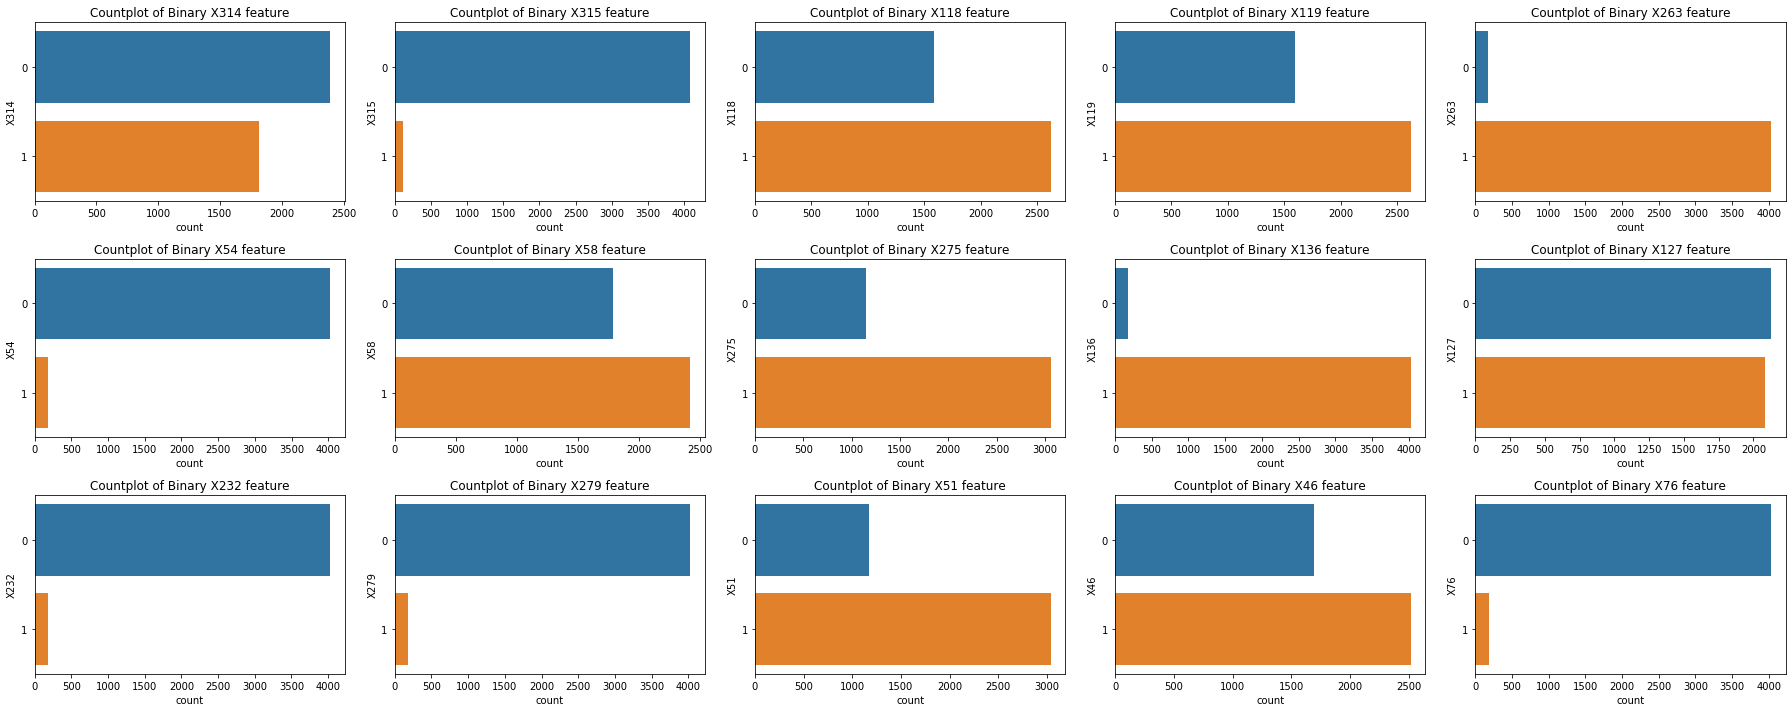

In [23]:
# Declare the subplot and top 15 binary features 
fig, ax = plt.subplots(3, 5, figsize=(25, 10))

# Plotting countplot in binary features
for ax, catplot in zip(ax.flatten(), sorted(feature_imp, reverse = True)):
    sns.countplot(y=catplot[1], data=X_train, ax=ax, order=np.unique(X_train.values))
    ax.set_title('Countplot of Binary ' + catplot[1] + ' feature')

plt.tight_layout()  
plt.show()

### Barplot of Binary features

<Figure size 432x7200 with 0 Axes>

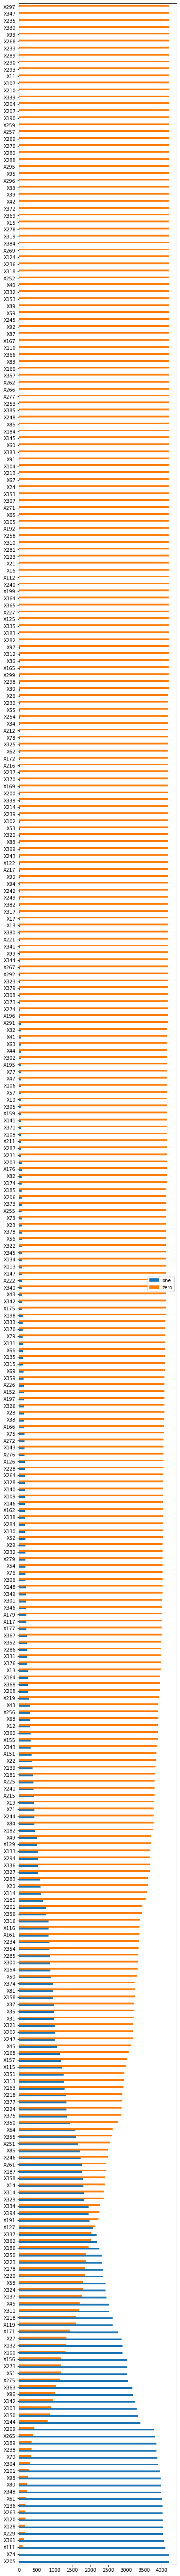

In [24]:
# Create Dataframe
binary = pd.DataFrame()

# Counting one store in the dataframe
binary['one']  = (X_train.select_dtypes('int64') == 1).sum()
# Couting zero store in the dataframe 
binary['zero']  = (X_train.select_dtypes('int64') == 0).sum()
# sort the value to get better visulization
binary = binary.sort_values('zero')

#plotting bar plot of all binary features
plt.figure(figsize=(6,100))
binary.plot.barh(y = ['one', 'zero'],figsize = (6, 100))
plt.show()

## OBSERVATION BARPLOT
### Que - What is zero, one counts in the binary features ? 
*   Value of the one is lower than zero in binary features, 60% of features lies between 0-500 value of one.
*   75% binary features have greater than 50% value zeros, We conclude that higher number of feature have zeros value and few number of feature have ones value.







# Exploratory Data Analysis of Categorical Features

### Countplot of Categorical features

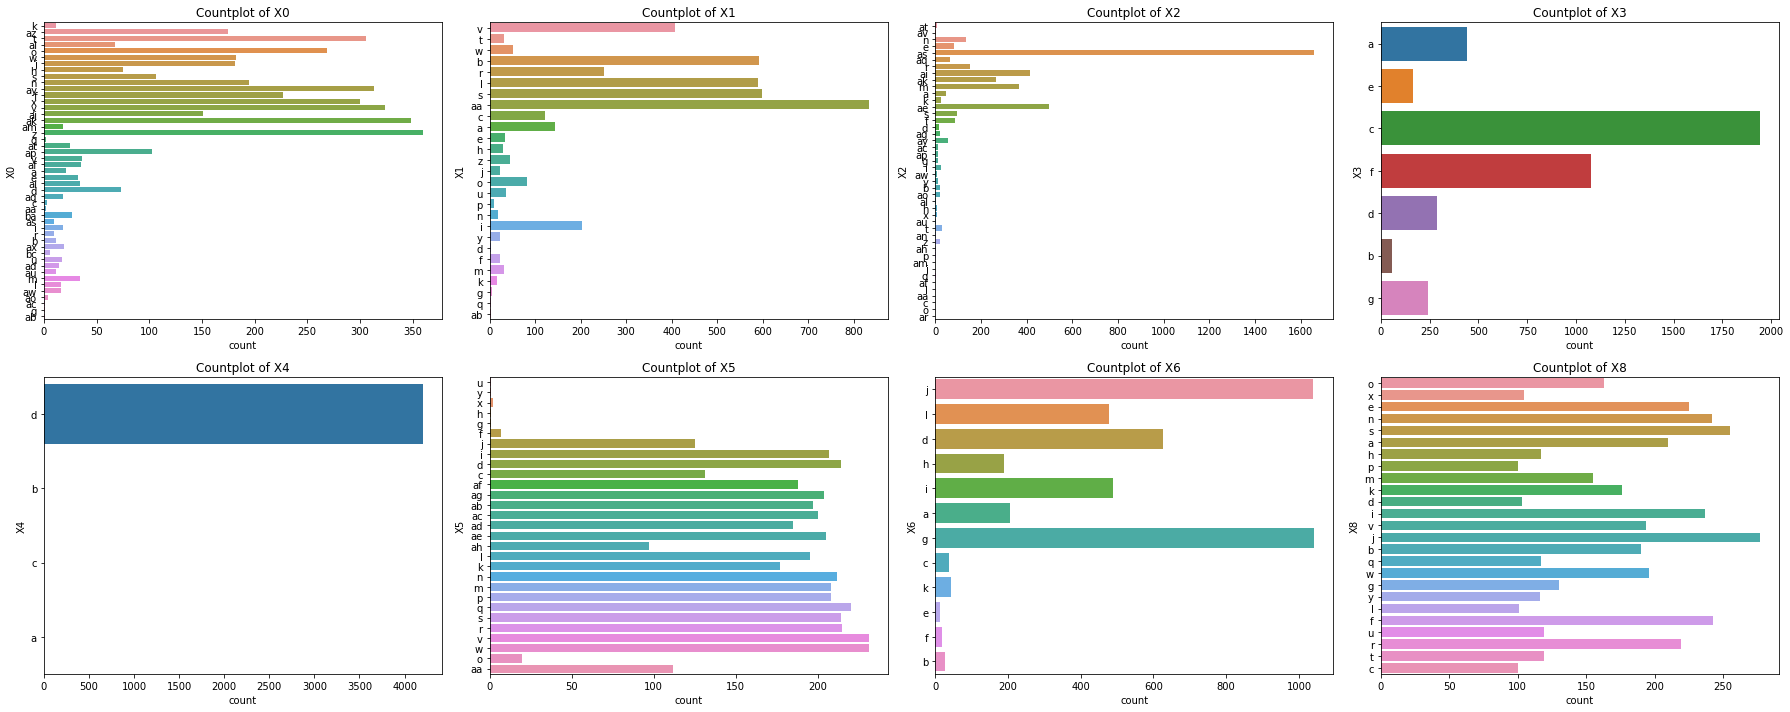

In [25]:
# create the subplot and set plot size
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

# categorical features index
cat = ["X0", "X1", "X2",'X3','X4','X5','X6','X8'] 
axes = ax.flatten()
x_cat = train[cat]

# plot the countplot with help of for loop
for ax, catplot in zip(axes, x_cat):
    sns.countplot(y=catplot , data = train,ax=ax)
    ax.set_title('Countplot of ' + catplot)

#The tight_layout() function in pyplot module of matplotlib library is used to automatically,adjust subplot parameters.
plt.tight_layout()  
plt.show()

## OBSERVATION OF COUNTPLOT FOR CATEGORICAL FEATURES
### Que - What is the value counting in categorical featues ?

*   Feature X8 and X5 are roughly balanced but feature X4 have only one value constant value (d). 

*   In feature X2, X0 and X2, some category like m,k,g,q, at,az are less than 50 counting.








### Scatterplot of categorical features

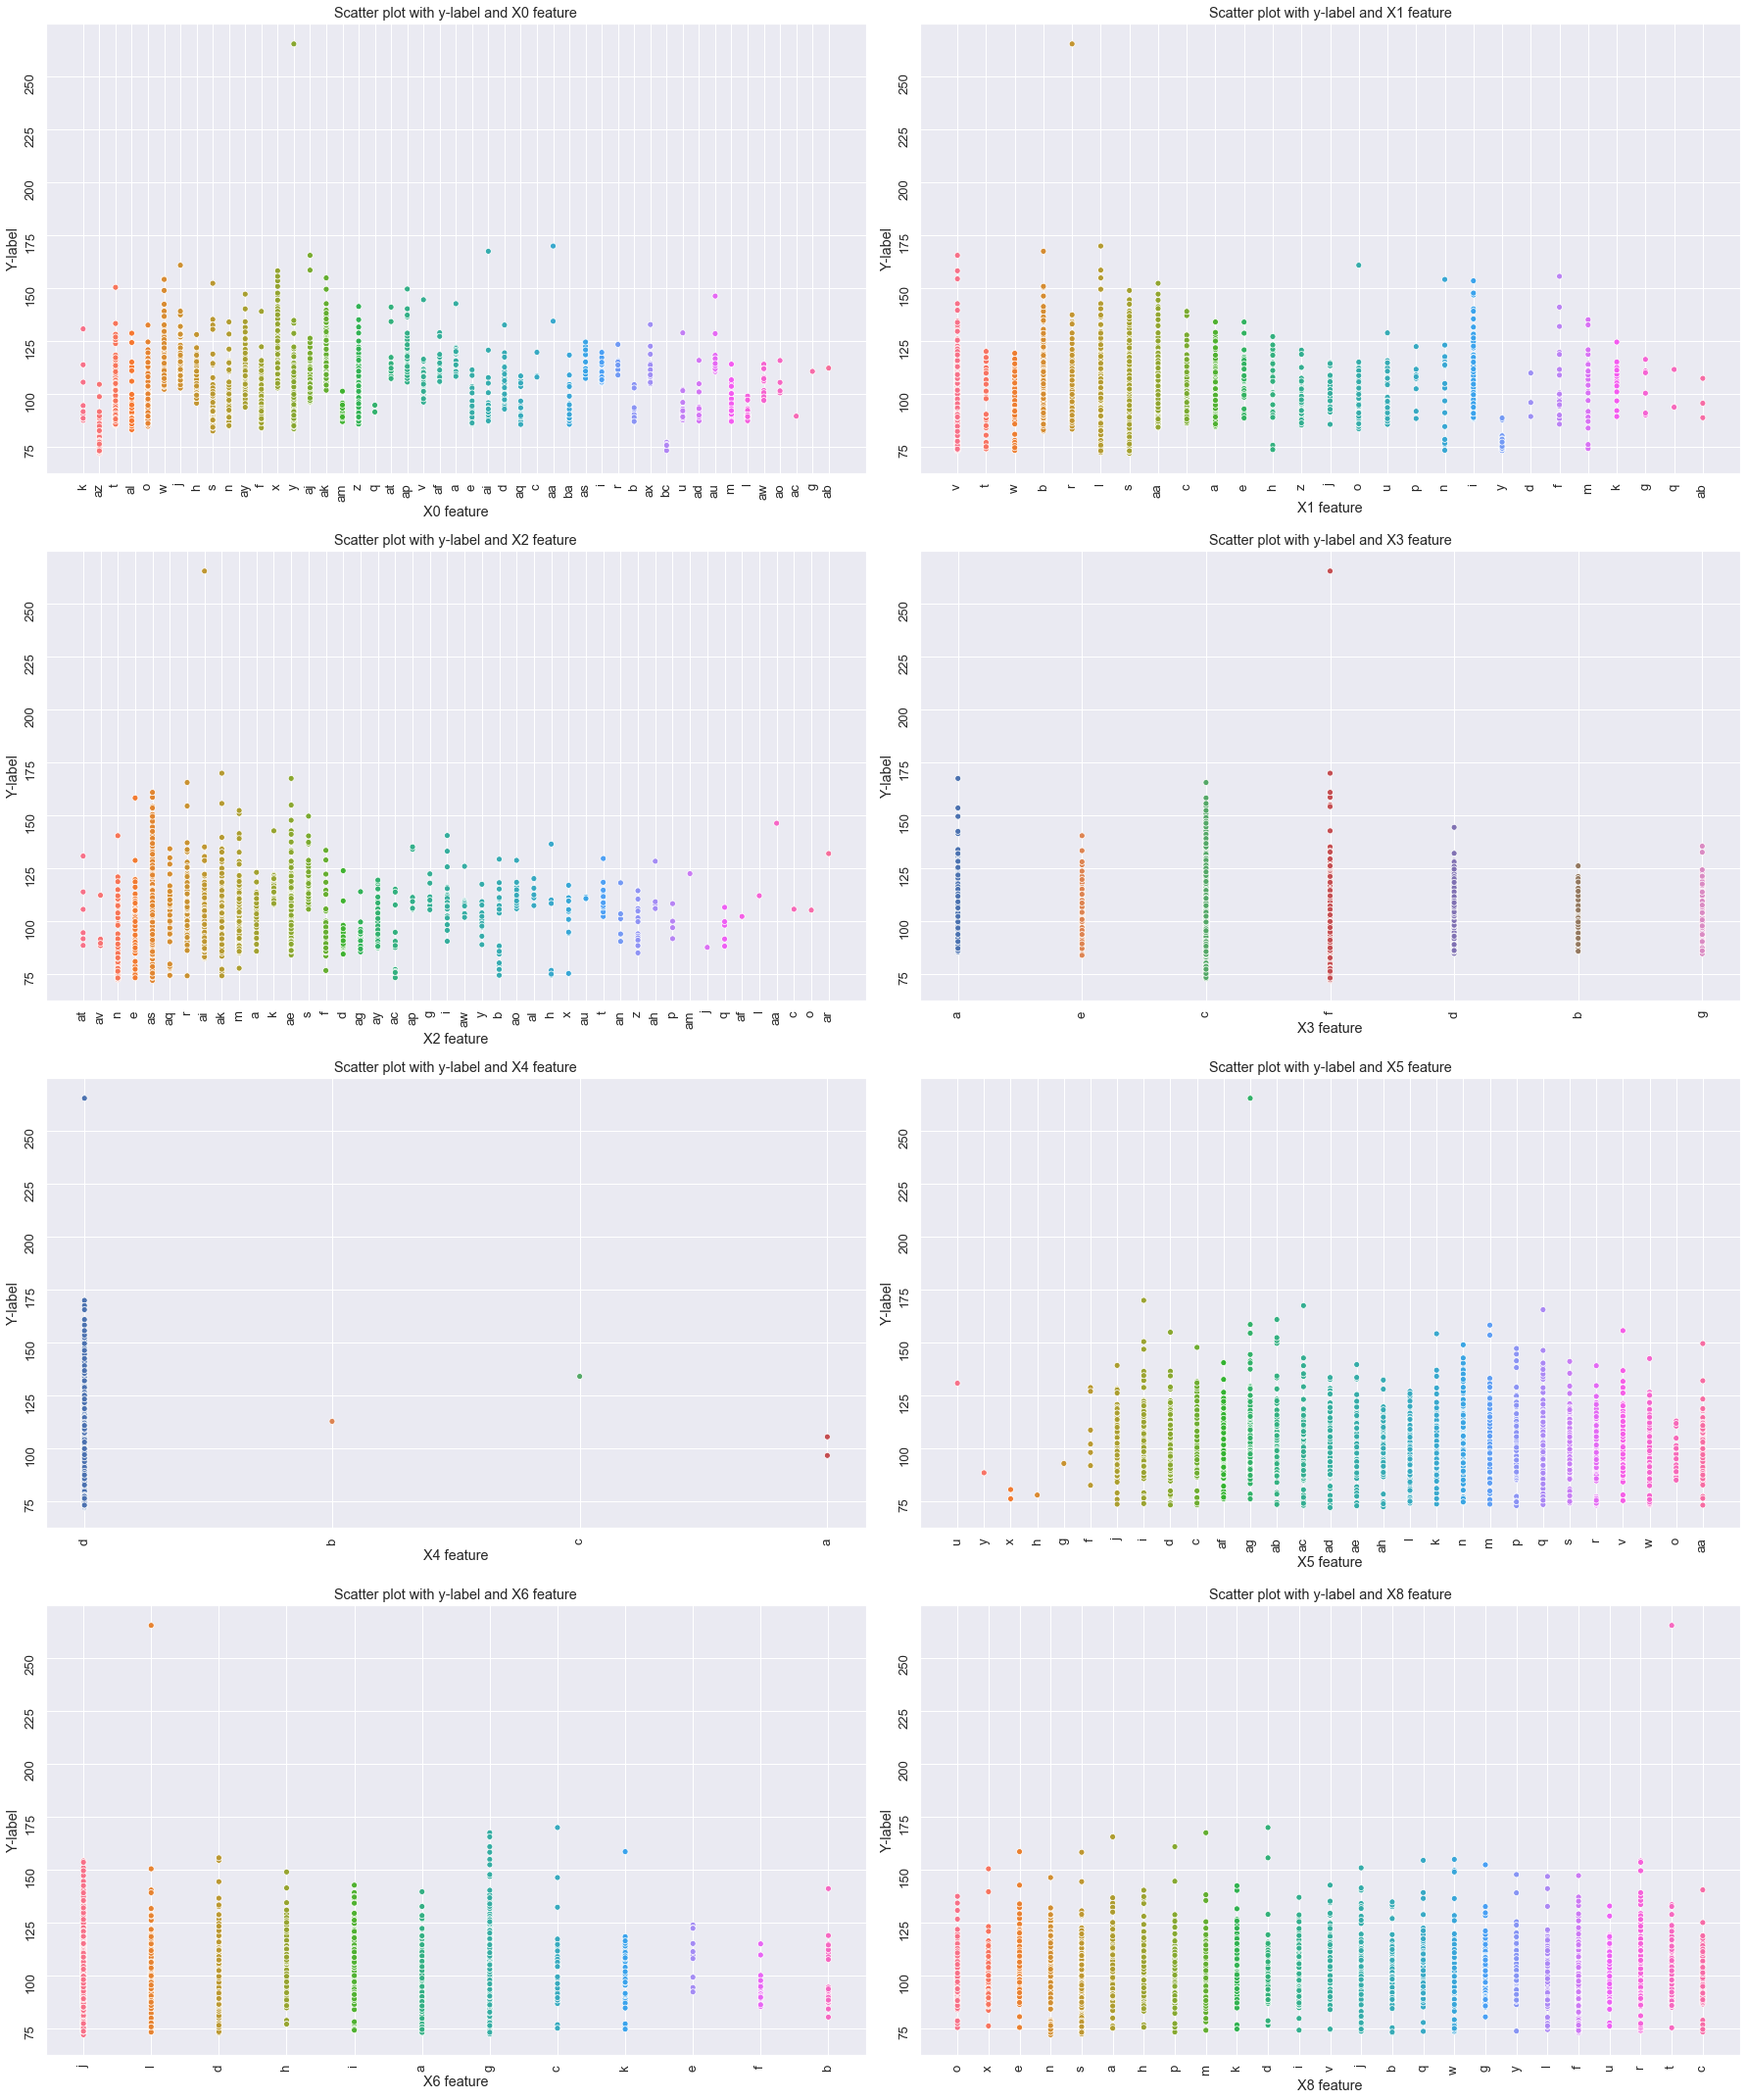

In [26]:
# Change label font
sns.set(font_scale=1.2)

# Create the subplot 2 rows and 4 columns
fig, axes = plt.subplots(4,2, figsize=(25,30))

# categorical features index
a = ["X0", "X1", "X2",'X3','X4','X5','X6','X8']
j = 0

# plotting scatterplot of categorical features
for ax in axes.flatten():
  #scatterplot for the categorical feature
  ax.set_title('Scatter plot with y-label and ' + a[j] +' feature')
  sns.scatterplot(x= a[j], y= Y_train, data= train,hue = a[j], ax= ax , legend= False)
  ax.set_xlabel(a[j] + ' feature')
  ax.set_ylabel('Y-label')
  ax.tick_params(labelrotation=90)
  j+=1
  
plt.tight_layout()  
plt.show()

# OBSERVATION OF SCATTERPLOT FOR CATEGORICAL FEATURES
### What is the Relationship between y feature and catogorical features ?

*   We conclude from scatter plot of X0 feature, X0 feature's data lies between 80-150 secs. 
*   Some points far from cluster of points and above the 150secs. 
*   few points is above the 200secs, it could be an outlier.
*   For the feature X1, some labels has few data points and some labels points high amount points.
*   Only one point is above the 200secs, we will remove it later.
*   For the feature X2 same like feature X0

*   X2's some category have only few points, 40% points above 125secs of testing time. X3 categorys are well clusterd. 

*   X4 have only majority category d, exept all have only few data.
*   Mostly other categorical features data lies between 75-140 secs of car testing time.








### Boxplot of categorical features

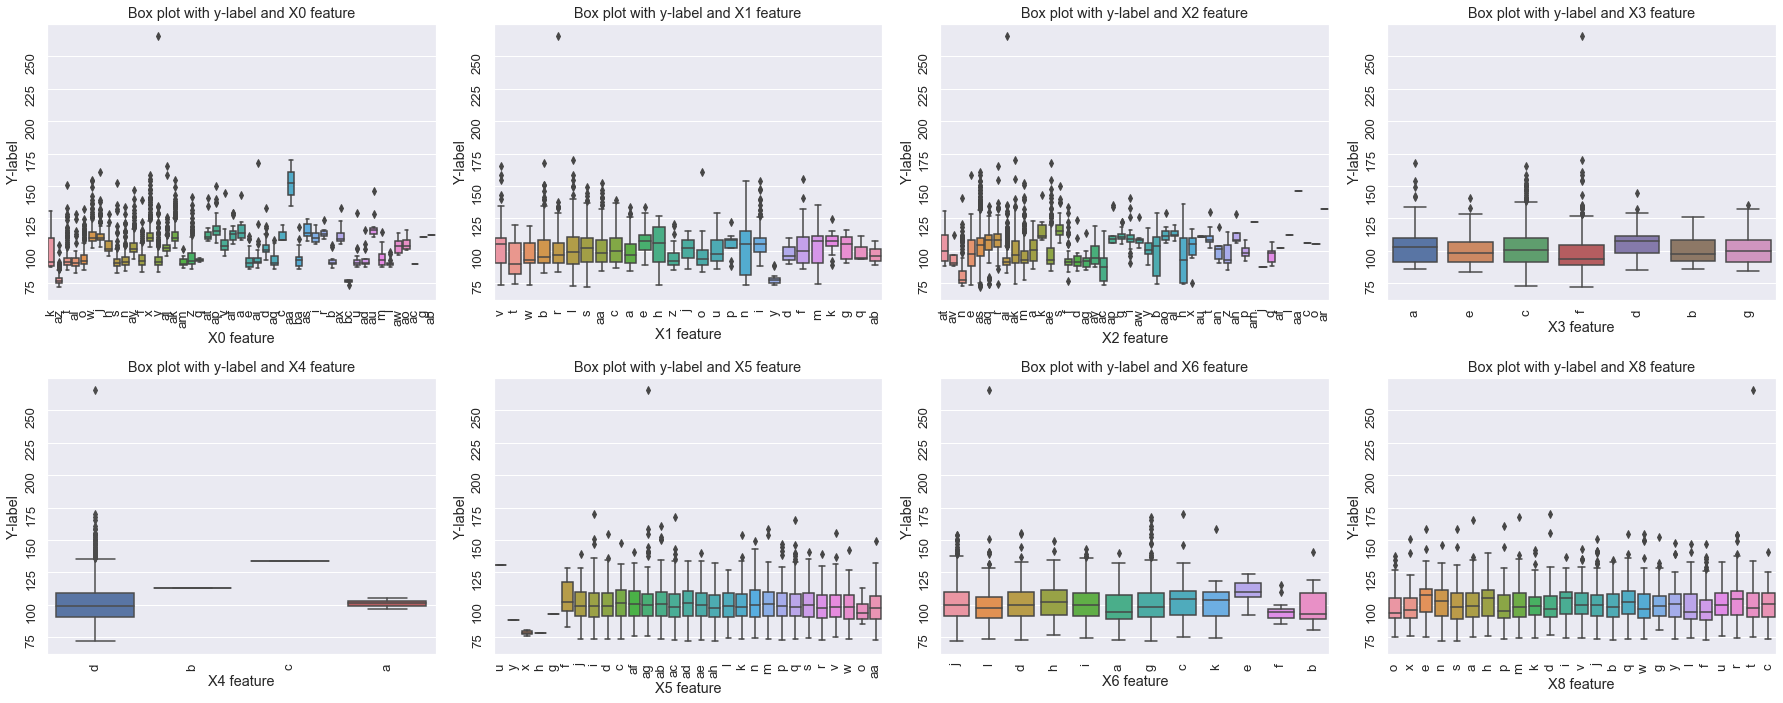

In [27]:
# Decleare the subplot and plot size
fig, ax = plt.subplots(2,4, figsize=(25,10))

# categorical feature index
cat = ["X0", "X1", "X2",'X3','X4','X5','X6','X8']

# Create the loop to help the plot the boxplot
for i,j in zip(cat, ax.flatten()):
  j.set_title('Box plot with y-label and ' + i+' feature')
  sns.boxplot(x= i , y= Y_train, data= train, ax=j)
  j.set_xlabel( i + ' feature')
  j.set_ylabel('Y-label')
  j.tick_params(labelrotation=90)

  
plt.tight_layout()  
plt.show()

# OBSERVATION OF BOXPLOT FOR CATEGORICAL FEATURES
### What is the IQR of categorical features ?

*   Conclusion of above X3 features plot is IQR between 100-123 secs, some points is above the whiskers.
*   In Feature X3, roughly all categorical values median near.
*   For the feature X4 only one category has good points than other and its IQR between 100-125 secs
*   In feature X5 few category has less point except all labels has good Inner Quntile Range.
*   For the feature X6 and X7 has high range of points is out of boxplot whiskers and some point is above 200secs.
*   In feature X6, X8 50% of the points lies between 90sec-123secs and roughly distribution is uniform.







In [28]:
def remove_rows(data, col, count):
    '''
    This function remove rows which categorical value count
    have less 20
    
    data -- dataset
    col -- which col want to remove rows
    
    return dataframe with removed rows
    
    '''
    # Create the dict of the value count [a : 20, ab : 1]
    List  = data[col].value_counts()      
    
    # Map dict into the column 
    array = data[col].map(List)
                 
    # Get the indicies of the rows which categories value-count is less than 20
    unwanted = [index for index, value in zip(array.index, array) if value < count] 
                 
    # Drop the rows which one value counts is less than 20
    dataframe = data.drop(unwanted, axis = 0)
                 
    return dataframe

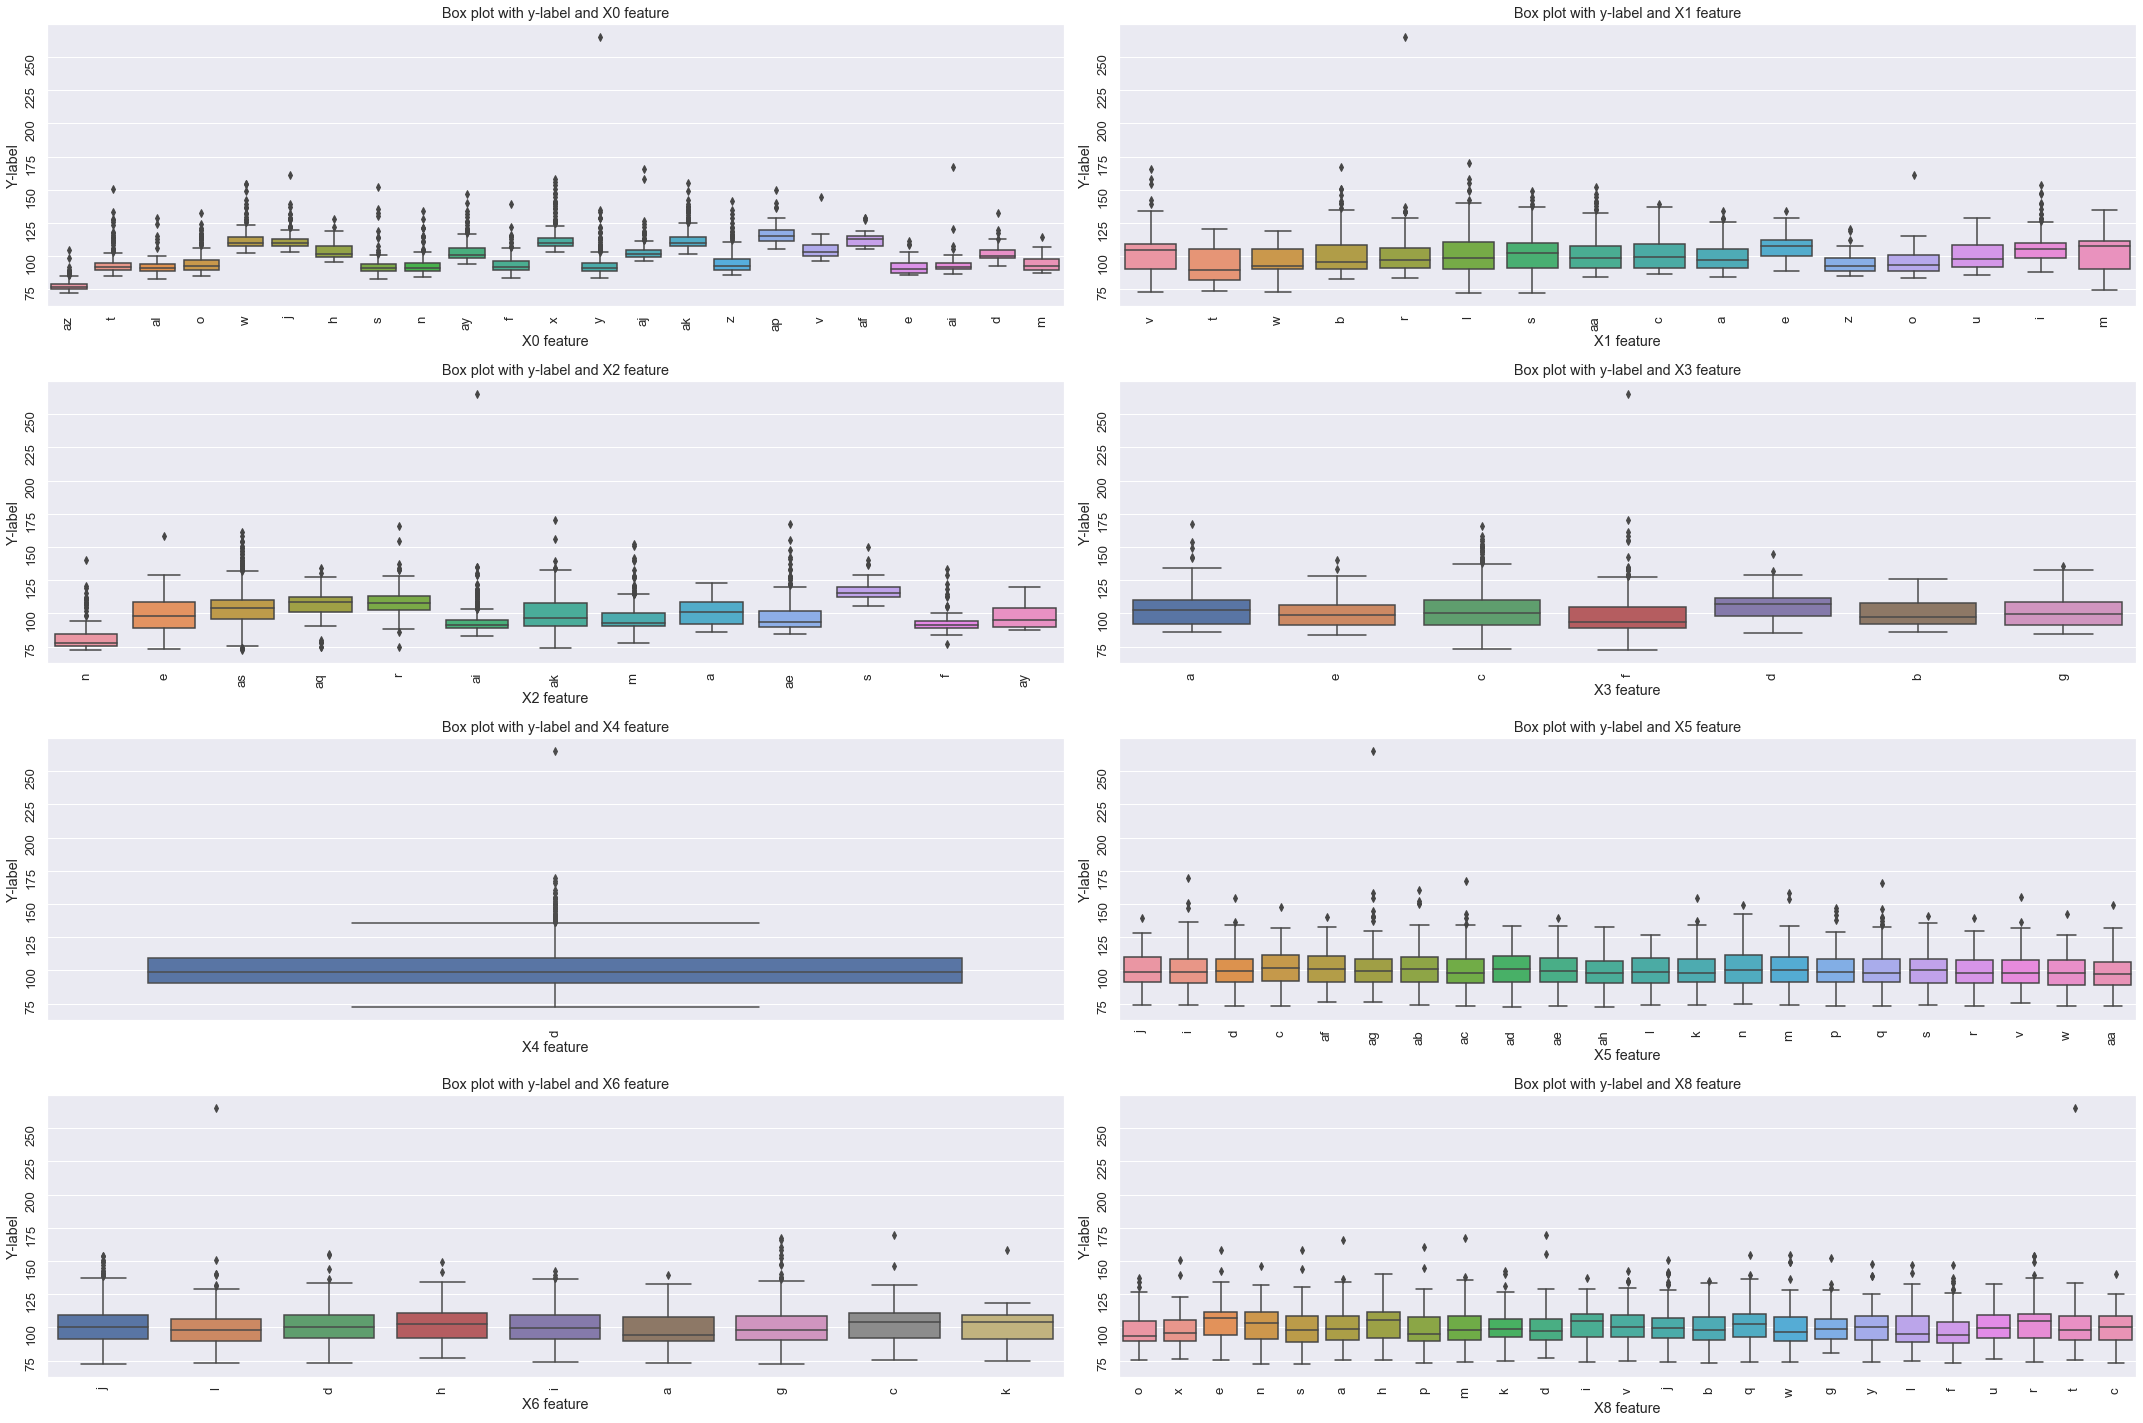

In [29]:
# Decleare the subplot and plot size
fig, ax = plt.subplots(4,2, figsize=(30,20))

# categorical feature index
cat = ["X0", "X1", "X2",'X3','X4','X5','X6','X8']

# Create the loop to help the plot the boxplot
for i,j in zip(cat, ax.flatten()):
    
  j.set_title('Box plot with y-label and ' + i+' feature')

  # Call the remove_row function to remove rows
  data = remove_rows(train, i, 30)

  sns.boxplot(x = i , y = Y_train, data = data, ax = j)
  j.set_xlabel( i + ' feature')
  j.set_ylabel('Y-label')
  j.tick_params(labelrotation=90)
  
plt.tight_layout()  
plt.show()

# Feature Engineering part - 1

In [29]:
test_1  = test
train_1 = train 
train_1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Label encoding in categorical features

In [30]:
#label encodeing in test and train
cat = ["X0", "X1", "X2",'X3','X4','X5','X6','X8']

for i in cat:
    
  lr = LabelEncoder()
  
  # label encoding in the train data
  train_value = lr.fit_transform(train_1[i])
  train_1[i + "_label_encode"] = train_value

  # label encodine in the test data
  test_value = lr.fit_transform(test_1[i])
  test_1[i + '_label_encode'] = test_value

train_1[['X6_label_encode' ,'X8_label_encode']].head()

,X6_label_encode,X8_label_encode
0,9,14
1,11,14
2,9,23
3,11,4
4,3,13


In [37]:
test_1.iloc[:, 9:].shape

(4209, 376)

## PCA Features

In [38]:
pca =  PCA(n_components=5)
pca = pca.fit(train_1.iloc[:, 10:])
#dump(pca, 'pca.joblib') 
pca_train = pca.transform(train_1.iloc[:, 10:])
pca_test = pca.transform(test_1.iloc[:, 9:])

for i in range(5):
    
    train_1['pca_feature'+ str(i)] = pca_train[:, i]
    test_1['pca_feature'+ str(i)]  = pca_test[:, i]

train_1['pca_feature1'].head()

0    -0.133009
1     1.560333
2    12.292846
3    13.535419
4    13.175004
Name: pca_feature1, dtype: float64

### Differance_ratio_encoding

In [20]:
def differance_ratio(data, col1, col2, col3, col4):
  
    ''' Using data's different columns, combine and divide it
        data -- datasets
        col1, col2, col3, col4 = dataset's different columns
        '''
    array = (data[col1] + data[col2]) / (data[col3] + data[col4] + 1 ) 
    return array


# function apply on the train data's different columns
train_1['X315_314_51_299']  = differance_ratio(train_1, 'X315', 'X314', 'X51', 'X299')
train_1['X299_300_301_271'] = differance_ratio(train_1, 'X299', 'X300', 'X301', 'X271')
train_1['X50_88_51_31']     = differance_ratio(train_1, 'X50', 'X88', 'X51', 'X31')
train_1['X46_263_119_261']  = differance_ratio(train_1, 'X46', 'X263', 'X118', 'X261')
train_1['X136_118_136_60']  = differance_ratio(train_1, 'X136', 'X118', 'X136', 'X60')

# function apply on the test data's different columns
test_1['X315_314_51_299']  = differance_ratio(test_1, 'X315', 'X314', 'X51', 'X299')
test_1['X299_300_301_271'] = differance_ratio(test_1, 'X299', 'X300', 'X301', 'X271')
test_1['X50_88_51_31']     = differance_ratio(test_1, 'X50', 'X88', 'X51', 'X31')
test_1['X46_263_119_261']  = differance_ratio(test_1, 'X46', 'X263', 'X118', 'X261')
test_1['X136_118_136_60']  = differance_ratio(test_1, 'X136', 'X118', 'X136', 'X60')


train_1['X136_118_136_60'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: X136_118_136_60, dtype: float64

### Quadratic_encoding


In [21]:
def quadratic_encode(data, col1, col2):
    
    ''' Using quadaric formula and apply on the dataset different columns and some weights(values) '''
    
    array = data[col1]**2 + 5 * data[col1] + 8
    return array


# apply function and create new train data features
train_1['qua_encode_1'] = quadratic_encode(train_1, 'pca_feature1', 'X50_88_51_31')
train_1['qua_encode_2'] = quadratic_encode(train_1, 'pca_feature3', 'X270')
train_1['qua_encode_3'] = quadratic_encode(train_1, 'pca_feature0', 'X300')
train_1['qua_encode_4'] = quadratic_encode(train_1, 'X50_88_51_31', 'X315_314_51_299')


# apply function and create new test data features
test_1['qua_encode_1'] = quadratic_encode(test_1, 'pca_feature1', 'X50_88_51_31')
test_1['qua_encode_2'] = quadratic_encode(test_1, 'pca_feature3', 'X270')
test_1['qua_encode_3'] = quadratic_encode(test_1, 'pca_feature0', 'X300')
test_1['qua_encode_4'] = quadratic_encode(test_1, 'X50_88_51_31', 'X315_314_51_299')

train_1[['qua_encode_3']].head()

,qua_encode_3
0,11.451759
1,11.146718
2,351.504054
3,349.572422
4,361.197588


In [22]:
def cos_encode(data, col1, col2, col3, col4):
    
    aa = ((data[col1] + 0.8) + np.cos(data[col2] + 0.5)) 
    bb = ((data[col3] + 3.5) + np.cos(data[col4] + 5.0))
    array = (aa / bb)
    return array

# apply function and create new train data features
train_1['cos_encode_1'] = cos_encode(train_1, 'X315_314_51_299', 'X50_88_51_31', 'qua_encode_3', 'qua_encode_2')
train_1['cos_encode_2'] = cos_encode(train_1, 'X136_118_136_60','X315', 'qua_encode_1', 'qua_encode_4')
train_1['cos_encode_3'] = cos_encode(train_1, 'X300', 'X299_300_301_271', 'qua_encode_3', 'qua_encode_2')
train_1['cos_encode_4'] = cos_encode(train_1, 'X50_88_51_31', 'X315_314_51_299', 'X118', 'X46_263_119_261')


# apply function and create new test data features
test_1['cos_encode_1'] = cos_encode(test_1, 'X315_314_51_299', 'X50_88_51_31', 'qua_encode_3', 'qua_encode_2')
test_1['cos_encode_2'] = cos_encode(test_1, 'X136_118_136_60','X315', 'qua_encode_1', 'qua_encode_4')
test_1['cos_encode_3'] = cos_encode(test_1, 'X300', 'X299_300_301_271', 'qua_encode_3', 'qua_encode_2')
test_1['cos_encode_4'] = cos_encode(test_1, 'X50_88_51_31', 'X315_314_51_299', 'X118', 'X46_263_119_261')


train_1['cos_encode_4'].head()

0    0.307240
1    0.322075
2    0.376125
3    0.376125
4    0.376125
Name: cos_encode_4, dtype: float64

In [24]:
train_1.shape, Y_train.shape,test_1.shape

((4209, 404), (4209,), (4209, 403))

In [ ]:
# Save the pca features

# save the label encoding
test_x0_label = dict(zip(test.X0.values, test_1.X0_label_encode.values))
test_x1_label = dict(zip(test.X1.values, test_1.X1_label_encode.values))
test_x2_label = dict(zip(test.X2.values, test_1.X2_label_encode.values))
test_x3_label = dict(zip(test.X3.values, test_1.X3_label_encode.values))
test_x4_label = dict(zip(test.X4.values, test_1.X4_label_encode.values))
test_x5_label = dict(zip(test.X5.values, test_1.X5_label_encode.values))
test_x6_label = dict(zip(test.X6.values, test_1.X6_label_encode.values))
test_x8_label = dict(zip(test.X8.values, test_1.X8_label_encode.values))

pickle.dump(test_x0_label, open("test_x0_label.pkl", "wb")) 
pickle.dump(test_x1_label, open("test_x1_label.pkl", "wb")) 
pickle.dump(test_x2_label, open("test_x2_label.pkl", "wb")) 
pickle.dump(test_x3_label, open("test_x3_label.pkl", "wb")) 
pickle.dump(test_x4_label, open("test_x4_label.pkl", "wb")) 
pickle.dump(test_x5_label, open("test_x5_label.pkl", "wb")) 
pickle.dump(test_x6_label, open("test_x6_label.pkl", "wb")) 
pickle.dump(test_x8_label, open("test_x8_label.pkl", "wb")) 


#train data
train_x0_label = dict(zip(train.X0.values, train_1.X0_label_encode.values))
train_x1_label = dict(zip(train.X1.values, train_1.X1_label_encode.values))
train_x2_label = dict(zip(train.X2.values, train_1.X2_label_encode.values))
train_x3_label = dict(zip(train.X3.values, train_1.X3_label_encode.values))
train_x4_label = dict(zip(train.X4.values, train_1.X4_label_encode.values))
train_x5_label = dict(zip(train.X5.values, train_1.X5_label_encode.values))
train_x6_label = dict(zip(train.X6.values, train_1.X6_label_encode.values))
train_x8_label = dict(zip(train.X8.values, train_1.X8_label_encode.values))

pickle.dump(train_x0_label, open("train_x0_label.pkl", "wb")) 
pickle.dump(train_x1_label, open("train_x1_label.pkl", "wb")) 
pickle.dump(train_x2_label, open("train_x2_label.pkl", "wb")) 
pickle.dump(train_x3_label, open("train_x3_label.pkl", "wb")) 
pickle.dump(train_x4_label, open("train_x4_label.pkl", "wb")) 
pickle.dump(train_x5_label, open("train_x5_label.pkl", "wb")) 
pickle.dump(train_x6_label, open("train_x6_label.pkl", "wb")) 
pickle.dump(train_x8_label, open("train_x8_label.pkl", "wb")) 

## OBSERVATION OF FEATURE ENGINEERING
*   Created some synthetic features from old features, taken binary and categorical top features from above mentioned feature selection method.
*   Then created top features using different method like label encoding, mean_encoding, etc.



## Plotting Feature Importance in different model


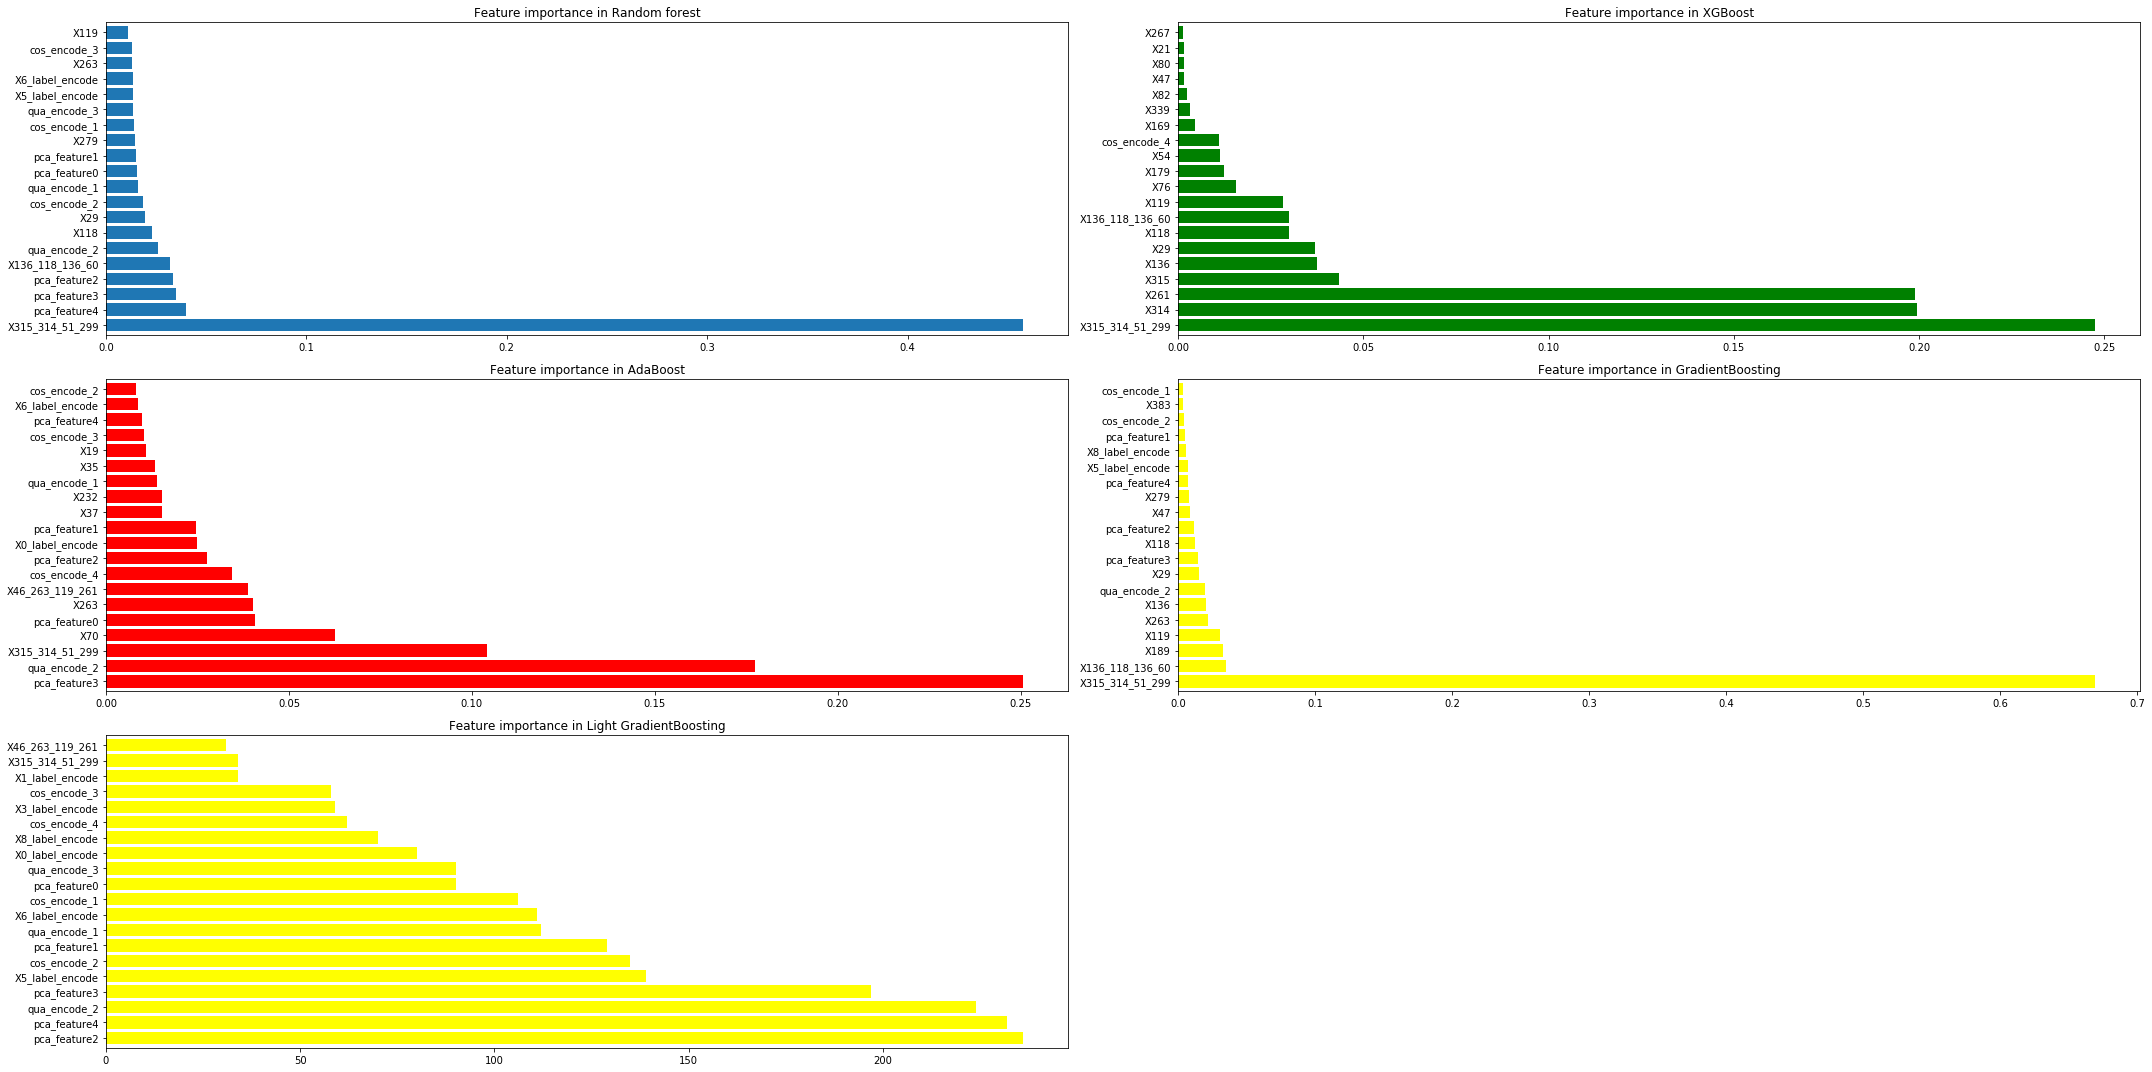

In [35]:
X_train = train_1.iloc[:, 10:]   # select features which are pre-processed, without categorical features

#created subplot and set fug size
fig, ax = plt.subplots(3,2, figsize=(30,15))

''' Feature importance in Random forest '''
rf = RandomForestRegressor().fit(X_train,Y_train)
rf_importances = pd.Series(rf.feature_importances_, index = X_train.columns)             
rf_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[0,0])                 
ax[0,0].set_title('Feature importance in Random forest')

''' Feature importance in XGBoost '''
xg = XGBRFRegressor().fit(X_train,Y_train)
xg_importances = pd.Series(xg.feature_importances_, index = X_train.columns)                
xg_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[0,1], color = 'green') 
ax[0,1].set_title('Feature importance in XGBoost')

''' Feature importance in AdaBoost '''
ab = AdaBoostRegressor().fit(X_train,Y_train)
ab_importances = pd.Series(ab.feature_importances_, index = X_train.columns)                
ab_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[1,0], color = 'red') 
ax[1,0].set_title('Feature importance in AdaBoost')

''' Feature importance in Gradient Bossting '''
gb = GradientBoostingRegressor().fit(X_train,Y_train)
gb_importances = pd.Series(gb.feature_importances_, index = X_train.columns)                
gb_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[1,1], color = 'yellow') 
ax[1,1].set_title('Feature importance in GradientBoosting')

''' Feature importance in Light gradient Bossting '''
lb = LGBMRegressor().fit(X_train,Y_train)
lb_importances = pd.Series(lb.feature_importances_, index = X_train.columns)                
lb_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[2,0], color = 'yellow') 
ax[2,0].set_title('Feature importance in Light GradientBoosting')

#https://stackoverflow.com/questions/28738836/matplotlib-with-odd-number-of-subplots
fig.delaxes(ax[2,1]) #The indexing is zero-based here

plt.tight_layout()
plt.show()

## OBSERVATION OF FEATURE IMPORTANCE PLOT

*   We can observe from above plot, We created synthetic features are good performe in model. Top features are mostly synthetic features.


*   With help of different machine learning algorithms, use for feature importance, Taken top 15 feature from above plots






In [33]:
train_1['y'] = Y_train
train_1.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/pca+feature_train.csv')

test_1.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/pca+feature_test.csv')

# Feature Engineering part - 2

* I will do in this part of feature engineering, remove binary features which have 0.01 threshold value of var.

* I will remove categorical features which have constant values throughout.

* 2nd i will create 100 features using pca method.

* Then using label and pca feature will create new synethic features.

In [203]:
train_2 = pd.read_csv(r'C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/train.csv')
test_2  = pd.read_csv(r'C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/test.csv')
train_2.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [204]:
# Drop the binary features which have less than 0.01 var.
var_dic = {}
for col in train_2.columns[10:]:
    if train_2[col].var()<= 0.01:
       var_dic[col]= train_2[col].var()

remove_col = var_dic.keys()
train_2 = train_2.drop(remove_col, axis= 1)
test_2  = test_2.drop(remove_col, axis= 1)

# Drop the feature X4 almost constant
train_2 = train_2.drop(['X4'], axis=1)
test_2 = test_2.drop(['X4'], axis=1)

train_2.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X363,X367,X368,X371,X373,X374,X375,X376,X377,X378
0,0,130.81,k,v,at,a,u,j,o,0,...,0,0,0,0,0,0,0,0,1,0
1,6,88.53,k,t,av,e,y,l,o,0,...,1,0,0,0,0,0,1,0,0,0
2,7,76.26,az,w,n,c,x,j,x,0,...,1,0,0,0,0,0,0,0,0,0
3,9,80.62,az,t,n,f,x,l,e,0,...,1,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,h,d,n,0,...,1,0,0,1,0,0,0,0,0,0


In [205]:
#label encodeing in test and train
cat = ["X0", "X1", "X2",'X3','X5','X6','X8']

for i in cat:
    
  lr = LabelEncoder()
  
  # label encoding in the train data
  train_value = lr.fit_transform(train_2[i])
  train_2[i + "_label_encode"] = train_value

  # label encodine in the test data
  test_value = lr.fit_transform(test_2[i])
  test_2[i + '_label_encode'] = test_value

train_2[['X6_label_encode' ,'X8_label_encode']].head()

,X6_label_encode,X8_label_encode
0,9,14
1,11,14
2,9,23
3,11,4
4,3,13


In [206]:
pca =  PCA(n_components=100)
pca_train = pca.fit_transform(train_2.iloc[:, 9:])
pca_test = pca.transform(test_2.iloc[:, 8:])

for i in range(100):
    
    train_2['pca_feature'+ str(i)] = pca_train[:, i]
    test_2['pca_feature'+ str(i)]  = pca_test[:, i]

train_2['pca_feature1'].head()

0    -0.132268
1     1.560621
2    12.292748
3    13.535373
4    13.175091
Name: pca_feature1, dtype: float64

In [207]:
def differance_ratio(data, col1, col2, col3, col4):
  
    ''' Using data's different columns, combine and divide it
        data -- datasets
        col1, col2, col3, col4 = dataset's different columns
        '''
    array = (data[col1] + data[col2]) / (data[col3] + data[col4] + 1 ) 
    return array


# function apply on the train data's different columns
train_2['X315_314_51_340']  = differance_ratio(train_2, 'X315', 'X314', 'X51', 'X340')
train_2['X299_300_301_328'] = differance_ratio(train_2, 'X29', 'X300', 'X301', 'X328')
train_2['X50_100_51_31']    = differance_ratio(train_2, 'X50', 'X100', 'X51', 'X31')
train_2['X46_263_119_261']  = differance_ratio(train_2, 'X46', 'X263', 'X119', 'X261')
train_2['X136_118_136_355'] = differance_ratio(train_2, 'X136', 'X118', 'X136', 'X355')

# function apply on the test data's different columns
test_2['X315_314_51_340']  = differance_ratio(test_2, 'X315', 'X314', 'X51', 'X340')
test_2['X299_300_301_328'] = differance_ratio(test_2, 'X29', 'X300', 'X301', 'X328')
test_2['X50_100_51_31']    = differance_ratio(test_2, 'X50', 'X100', 'X51', 'X31')
test_2['X46_263_119_261']  = differance_ratio(test_2, 'X46', 'X263', 'X119', 'X261')
test_2['X136_118_136_355'] = differance_ratio(test_2, 'X136', 'X118', 'X136', 'X355')



train_2['X136_118_136_355'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: X136_118_136_355, dtype: float64

In [208]:
def quadratic_encode(data, col1, col2):
    
    ''' Using quadaric formula and apply on the dataset different columns and some weights(values) '''
    
    array = data[col1]**2 + 5 * data[col1] + 8
    return array


# apply function and create new train data features
train_2['qua_encode_1'] = quadratic_encode(train_2, 'pca_feature1', 'pca_feature4')
train_2['qua_encode_2'] = quadratic_encode(train_2, 'pca_feature3', 'X270')
train_2['qua_encode_3'] = quadratic_encode(train_2, 'pca_feature0', 'X300')
train_2['qua_encode_4'] = quadratic_encode(train_2, 'pca_feature4', 'X315_314_51_299')


# apply function and create new test data features
test_2['qua_encode_1'] = quadratic_encode(test_2, 'pca_feature1', 'pca_feature4')
test_2['qua_encode_2'] = quadratic_encode(test_2, 'pca_feature3', 'X270')
test_2['qua_encode_3'] = quadratic_encode(test_2, 'pca_feature0', 'X300')
test_2['qua_encode_4'] = quadratic_encode(test_2, 'pca_feature4', 'X315_314_51_299')

train_2[['qua_encode_3']].head()

,qua_encode_3
0,11.450113
1,11.143521
2,351.430285
3,349.571432
4,361.198271


In [209]:
def cos_encode(data, col1, col2, col3, col4):
    
    aa = ((data[col1] + 0.8) + np.cos(data[col2] + 0.5))
    bb = ((data[col3] + 3.5) + np.cos(data[col4] + 5.0))
    array = (aa / bb)
    return array

# apply function and create new train data features
train_2['cos_encode_1'] = cos_encode(train_2, 'X315_314_51_340', 'X50_100_51_31', 'qua_encode_3', 'qua_encode_2')
train_2['cos_encode_2'] = cos_encode(train_2, 'X136_118_136_355','X315', 'qua_encode_1', 'qua_encode_4')
train_2['cos_encode_3'] = cos_encode(train_2, 'X300', 'X299_300_301_328', 'qua_encode_3', 'qua_encode_2')
train_2['cos_encode_4'] = cos_encode(train_2, 'X50_100_51_31', 'X315_314_51_340', 'X118', 'X46_263_119_261')


# apply function and create new test data features
test_2['cos_encode_1'] = cos_encode(test_2, 'X315_314_51_340', 'X50_100_51_31', 'qua_encode_3', 'qua_encode_2')
test_2['cos_encode_2'] = cos_encode(test_2, 'X136_118_136_355','X315', 'qua_encode_1', 'qua_encode_4')
test_2['cos_encode_3'] = cos_encode(test_2, 'X300', 'X299_300_301_328', 'qua_encode_3', 'qua_encode_2')
test_2['cos_encode_4'] = cos_encode(test_2, 'X50_100_51_31', 'X315_314_51_340', 'X118', 'X46_263_119_261')


train_2['cos_encode_4'].head()

0    0.307240
1    0.386071
2    0.376125
3    0.376125
4    0.376125
Name: cos_encode_4, dtype: float64

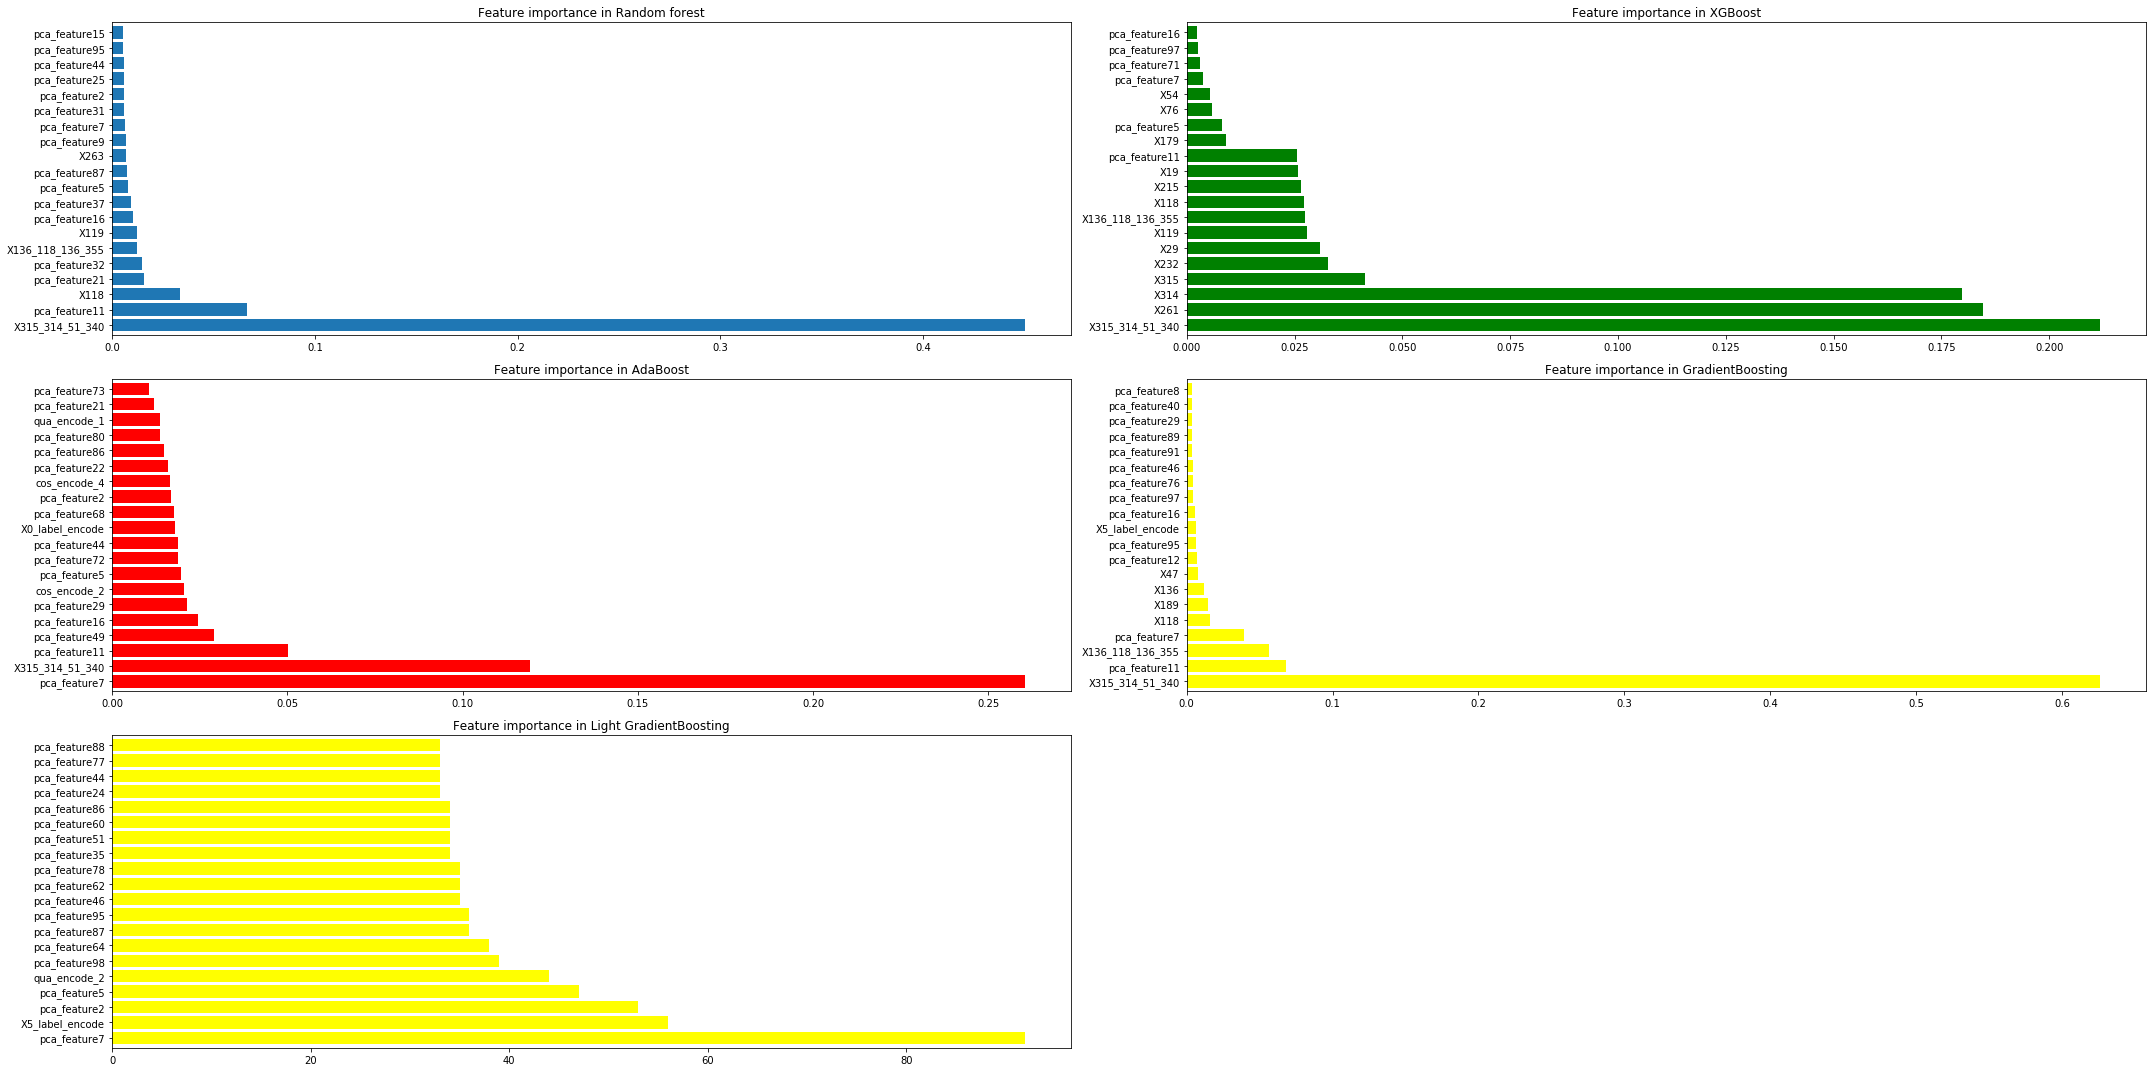

In [210]:
X_train = train_2.iloc[:, 10:]   # select features which are pre-processed, without categorical features

#created subplot and set fug size
fig, ax = plt.subplots(3,2, figsize=(30,15))

''' Feature importance in Random forest '''
rf = RandomForestRegressor().fit(X_train,Y_train)
rf_importances = pd.Series(rf.feature_importances_, index = X_train.columns)             
rf_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[0,0])                 
ax[0,0].set_title('Feature importance in Random forest')

''' Feature importance in XGBoost '''
xg = XGBRFRegressor().fit(X_train,Y_train)
xg_importances = pd.Series(xg.feature_importances_, index = X_train.columns)                
xg_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[0,1], color = 'green') 
ax[0,1].set_title('Feature importance in XGBoost')

''' Feature importance in AdaBoost '''
ab = AdaBoostRegressor().fit(X_train,Y_train)
ab_importances = pd.Series(ab.feature_importances_, index = X_train.columns)                
ab_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[1,0], color = 'red') 
ax[1,0].set_title('Feature importance in AdaBoost')

''' Feature importance in Gradient Bossting '''
gb = GradientBoostingRegressor().fit(X_train,Y_train)
gb_importances = pd.Series(gb.feature_importances_, index = X_train.columns)                
gb_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[1,1], color = 'yellow') 
ax[1,1].set_title('Feature importance in GradientBoosting')

''' Feature importance in Light gradient Bossting '''
lb = LGBMRegressor().fit(X_train,Y_train)
lb_importances = pd.Series(lb.feature_importances_, index = X_train.columns)                
lb_importances.nlargest(20).plot(kind='barh', width=0.8, ax = ax[2,0], color = 'yellow') 
ax[2,0].set_title('Feature importance in Light GradientBoosting')

#https://stackoverflow.com/questions/28738836/matplotlib-with-odd-number-of-subplots
fig.delaxes(ax[2,1]) #The indexing is zero-based here

plt.tight_layout()
plt.show()

In [211]:
train_2.shape, test_2.shape

((4209, 350), (4209, 349))

# OBSERVATION OF CORR MATRIX AND FEATURES

* We can see that in above plots of important features, created new synthetic features good perform in random forest and gradient boosting.

* PCA created features are well perform in the light-GBM, in other hand binary feature good work in xgboost method.

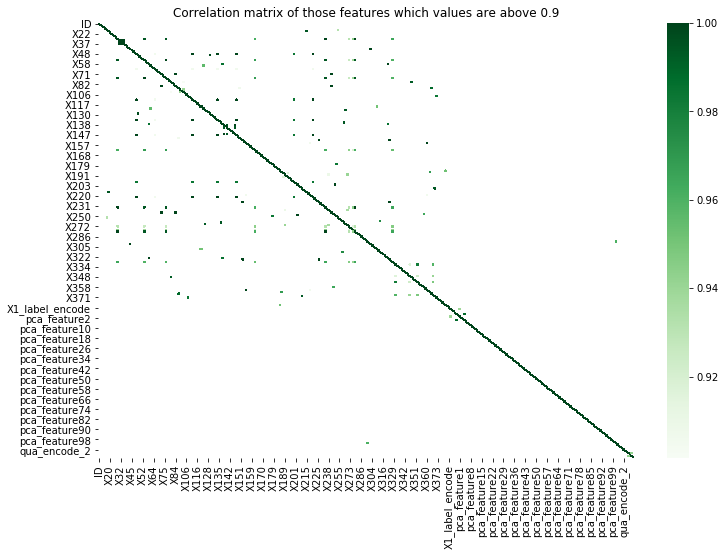

In [198]:
#https://datascience.stackexchange.com/questions/40602/can-we-remove-features-that-have-zero-correlation-with-the-target-label
corr = train_2.corr()
# get value which is more than 0.9
kot = corr[corr>=.9]
# set the figure size
plt.figure(figsize=(12,8))
# declear the heatmap
sns.heatmap(kot, cmap="Greens")
plt.title('Correlation matrix of those features which values are above 0.9')
plt.show()

# OBSERVATION OF CORR MATRIX

* WE see that in above plot, we set 0.90 threshold for all correlated features. Which feature is highly correlated to 0.9 except diagonal feature.

* Some features are above 0.90 correleted to each other in upper and lower triangle.

In [199]:
train_2.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X46_263_119_261,X136_118_136_355,qua_encode_1,qua_encode_2,qua_encode_3,qua_encode_4,cos_encode_1,cos_encode_2,cos_encode_3,cos_encode_4
0,0,130.81,k,v,at,a,u,j,o,0,...,1.0,1.0,7.356157,40.042486,11.450113,16.635806,0.108660,0.269955,0.108660,0.307240
1,6,88.53,k,t,av,e,y,l,o,0,...,0.5,1.0,18.238647,7.555795,11.143521,18.033104,0.094123,0.126098,0.107239,0.386071
2,7,76.26,az,w,n,c,x,j,x,0,...,1.0,0.0,220.575394,8.964781,351.430285,207.678981,0.004724,0.007467,0.003774,0.376125
3,9,80.62,az,t,n,f,x,l,e,0,...,1.0,0.0,258.883178,2.157439,349.571432,20.521269,0.004743,0.006371,0.003789,0.376125
4,13,78.02,az,v,n,f,h,d,n,0,...,1.0,0.0,247.458465,105.228690,361.198271,23.274338,0.004612,0.006711,0.003685,0.376125


In [200]:
test_2.head()

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X46_263_119_261,X136_118_136_355,qua_encode_1,qua_encode_2,qua_encode_3,qua_encode_4,cos_encode_1,cos_encode_2,cos_encode_3,cos_encode_4
0,1,az,v,n,f,t,a,w,0,0,...,1.000000,0.0,224.548992,10.072396,312.308605,177.282945,0.005326,0.007324,0.004255,0.376125
1,2,t,b,ai,a,b,g,y,0,0,...,1.000000,1.0,14.621592,5.192682,195.475085,207.584974,0.007427,0.143763,0.008462,0.368288
2,3,az,v,as,f,a,j,j,0,0,...,0.000000,0.0,1.817069,316.742834,192.476138,1.827151,0.007503,0.271773,0.006830,0.531473
3,4,az,l,n,f,z,l,n,0,0,...,1.000000,0.0,250.912016,74.641013,238.389045,27.102546,0.006948,0.006574,0.005551,0.376125
4,5,w,s,as,c,y,i,m,0,0,...,0.333333,1.0,32.232453,11.397421,94.289999,3.745380,0.018969,0.076602,0.019282,0.362136


In [133]:
train_2.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/top_train_feature.csv')

test_2.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/top_feature_test.csv')

# Feature Engineering part - 2

* In this part using feature selection method SelectKBest to select top 250 features.

In [212]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=250)

# apply feature selection
X = train_2.iloc[:, 9:]
y = Y_train
X_te = test_2.iloc[:, 8:]

fs.fit(X, y)
X_train = fs.transform(X)
X_test= fs.transform(X_te)

print(X_train.shape)
print(X_test.shape) 


(4209, 250)
(4209, 250)


In [213]:
# get the index of the top 250 features
columns = [ ]
for i,bol in enumerate(fs.get_support()):
    if bol == True :
        columns.append(i)

In [215]:
X.iloc[:, fs.get_support()].head()

,X10,X12,X13,X14,X19,X20,X22,X23,X27,X28,...,pca_feature98,X315_314_51_340,X299_300_301_328,X46_263_119_261,X136_118_136_355,qua_encode_2,qua_encode_3,cos_encode_1,cos_encode_3,cos_encode_4
0,0,0,1,0,0,0,0,0,0,0,...,-0.117690,0.0,0.0,1.0,1.0,40.042486,11.450113,0.108660,0.108660,0.307240
1,0,0,0,0,0,0,0,0,1,0,...,0.012419,0.0,0.0,0.5,1.0,7.555795,11.143521,0.094123,0.107239,0.386071
2,0,0,0,0,0,0,0,0,1,1,...,1.056965,0.0,0.5,1.0,0.0,8.964781,351.430285,0.004724,0.003774,0.376125
3,0,0,0,0,0,0,0,0,1,1,...,0.002459,0.0,0.5,1.0,0.0,2.157439,349.571432,0.004743,0.003789,0.376125
4,0,0,0,0,0,0,0,0,1,1,...,0.187224,0.0,0.5,1.0,0.0,105.228690,361.198271,0.004612,0.003685,0.376125


In [216]:
X_te.iloc[:, fs.get_support()].head()

,X10,X12,X13,X14,X19,X20,X22,X23,X27,X28,...,pca_feature98,X315_314_51_340,X299_300_301_328,X46_263_119_261,X136_118_136_355,qua_encode_2,qua_encode_3,cos_encode_1,cos_encode_3,cos_encode_4
0,0,0,0,0,0,0,0,0,1,1,...,0.099290,0.0,0.5,1.000000,0.0,10.072396,312.308605,0.005326,0.004255,0.376125
1,0,0,0,0,1,0,0,0,1,0,...,0.056844,0.0,0.0,1.000000,1.0,5.192682,195.475085,0.007427,0.008462,0.368288
2,0,0,0,1,0,0,0,0,1,0,...,-0.175165,0.0,0.5,0.000000,0.0,316.742834,192.476138,0.007503,0.006830,0.531473
3,0,0,0,0,0,0,0,0,1,1,...,0.111160,0.0,0.5,1.000000,0.0,74.641013,238.389045,0.006948,0.005551,0.376125
4,0,0,0,1,0,0,0,0,1,0,...,0.022616,0.5,1.0,0.333333,1.0,11.397421,94.289999,0.018969,0.019282,0.362136


In [218]:
df = X.iloc[:, fs.get_support()]

df['ID'] = train_2.ID
df['y']  = train_2.y

df.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/selectK_train_feature.csv')

df2 = X_te.iloc[:, fs.get_support()]
df2['ID'] = test_2.ID

df2.to_csv('C:/Users/Dell/python/Python AAIC File/Assignments/CASE-STUDY ML/mercedes-benz-greener-manufacturing/Datasets/selectK_test_feature.csv')